<hr style="height:5px;border-width:2;color:gray;background-color:#000000"> 
<center><h1>CS 144 - Winter 2024 - Mini-Assembler</h1></center>
<center><h1>Due: Sunday, March 17th, 2024 @ 11:59pm</h1></center>

### Enter your information below:

<div style="color: #000000;background-color: #EEEEFF">
    Your Name (submitter): Rayyan Zaid <br>
    Your student ID (submitter): 862291205
<br>
<br>
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>
<br>    
<br>
<b>Instruction for submissions:</B> when you have completed this project, download this .ipynb file to your computer by left-clicking on the file name, and submit to <a href="https://elearn.ucr.edu/">Canvas</A> by the deadline. 
<br>
<br>
<B>Late work:</B> There is no late deadline for the final project, except for the most serious circumstances (illness, medical emergency, etc.) which have to documented.
</div>


<hr style="height:5px;border-width:2;color:gray;background-color:#000000"> 
<center><h1>Assembler</h1></center>
<br>


The objective of this project is to implement software to assemble a (very short and non-repetitive) genome from synthetic reads. Here we assume that reads have no sequencing errors. (Credit: Ben Langmead)


**Step 1:** Let's get the reads in FASTA format. The reads come from the same synthetic genome and each is 100 bp long. For simplicity, these reads don't have any quality values. 

In [1]:
# !wget http://www.cs.ucr.edu/~stelo/cs144winter24/data/reads.fa

# Notation for Runtime and Space Complexity

n -- number of reads <br>
l -- length of each read sequence

# Step 1 Main Function

In [2]:

"""
Input: .fa file
Output: nameToSequence dictionary
Runtime: O(n)
Space: O(n)
"""
def convertFastaToDict(fastaFilePath : str) -> dict[str, str]:

        nameToSequence : dict = {}



        # Get file contents

        with open(fastaFilePath, 'r') as file:



            line1 = file.readline()
        

            while line1:

                line2 = file.readline()
                
            
                if not line2:
                    break 
                

                line1 = line1.strip()
                name = line1[1:]
                sequence =  line2.strip()
                
                
                
                # Add to dictionary

                nameToSequence[name] = sequence

                line1 = file.readline()
        
        return nameToSequence


# Test

# fastaDict = convertFastaToDict(fastaFilePath="reads.fa")

# print(fastaDict)

**Step 2:** Write code to find each read's *best buddy to the right* with a time-efficient algorithm. For each read **A**, find the other read **B** that has the **longest** suffix/prefix exact match with **A**. In other words, if a suffix of **A** matches a prefix of **B**, **B** is **A**'s *best buddy* to the right. **However**, if there is a tie, or if the longest suffix/prefix match is less than 40 nucleotides long, then **A** *has no best buddy to the right*.  For each read, your program should output either (a) nothing, if there is no best buddy to the right, or (b) a single, space-separated line with the IDs of **A** and **B** and the length of the overlap, like this:

    0255/2 2065/1 88

This indicates a 88 bp suffix of the read with ID **0255/2** that matches a prefix of the read with ID **2065/1**.  Because of how we defined best buddy, it also means no other read besides **2065/1** has a prefix of 88bp or longer that is also a suffix of read **0255/2**.  A corrolary of this is that a particular read ID should appear in the first column of your program's output at most once.  Also, since we require the overlap to be at least 40 bases long, the last column should not contain any number smaller than 40.

Notes:
* You can assume all reads are error-free and from the forward strand.  In other words, you do **not** need to consider sequencing errors or reverse complements
* The order of the output lines is not important
* Reading/parsing the FASTA files can be done with BioPython, or by borrowing code from <A HREF="https://nbviewer.jupyter.org/github/BenLangmead/comp-genomics-class/blob/master/notebooks/FASTA.ipynb">this</A> if you want your own custom solution

Important: Try to avoid comparing every read to every other read when looking for suffix/prefix matches. This can be achieved by grouping "similar" reads, that is reads that share common k-mers.  For instance, you can build a dictionary where the keys are k-mers and the values are sets containing the names of all reads containing that k-mer.  Since you are looking for overlaps of length at least 40, you only need to compare reads if they have at least 1 40-mer in common.

You are allowed to use any Python package that you want. You should be able install packages using `!pip install package`. Remember that it is mandatory to acknowledge sources.

# Step 2 Helper Functions

In [3]:
k = 40

In [4]:


"""
Input: 2 sequences that share an overlap of > 40
Output: overlap string
Compares 2 strings and finds the overlap 
of the left's suffix with the right's prefix. 

Time Complexity : O(l)

"""

def returnBBRSequence(mainSequence: str, rightSequence: str) -> str:
    # Initialize the length of the longest common sequence to 0
    longest_common_sequence = ""
    
    # Start range at k because we only compare strings with at least a k overlap
    for i in range(k, min(len(mainSequence), len(rightSequence)) + 1):

        suffix = mainSequence[-i:]
        prefix = rightSequence[:i]
        

        if suffix == prefix:
            longest_common_sequence = suffix 
    

    return longest_common_sequence


# Test
# Should print 88

# 0255/2
# mainString = "GCCTGTAGCTTAATCAACTGGACGCTGTTCGTGAAGCACCTCTCACATGATGGTTCTGCATGAAGGCTTCGCCTGCAACGAGGTGCTGCAGAAATCAGGA"

# 2065/1
# rightString = "ATCAACTGGACGCTGTTCGTGAAGCACCTCTCACATGATGGTTCTGCATGAAGGCTTCGCCTGCAACGAGGTGCTGCAGAAATCAGGAAATCGAAGGCGA"
# print(len(returnBBRSequence(mainString, rightString)))


"""
Input: a sequence
Output: Array of k-mers
Goes through a sequence and returns an array of its (len(string) - k + 1) k-mers

Time : O(l) because it iterates through the letters of a sequence (just once using a sliding window)

"""
def find_kmers(sequence, k):
    kmers = []
    for i in range(len(sequence) - k + 1):
        kmers.append(sequence[i:i+k])
    return kmers






# Step 2 Main Function

In [5]:
"""
Input: Name to Seq dictionary from step 1
Ouput: Dictionary of k-mer to set of names
Goes through each sequence's k-mers and adds them to the k-mer to name dictionary

Time Complexity: 

Goes through each read in nameToSeq --> O(n)
    For each read, we do 2 things:
        1. Get the kmers --> O(l)
        2. Go through each kmer O(l)

So in total,
Time Complexity: O(n * l)
Space of the kmerToNames dictionary: O(n * k) -- length of dictionary was 7706 and each kmer had around 40 reads.

"""
def kmerToNames(nameToSeq : dict, k: int) -> dict[str, set]:


    kmerToNames : dict[str,set] = dict()


    # For each name, we need to check its 40-mer prefix and 40-mer suffix

    for name,sequence in nameToSeq.items():

        kmers : list = find_kmers(sequence,k)

        # print(len(kmers))  Should be 61

        for eachKmer in kmers:
            
            if eachKmer not in kmerToNames:
                kmerToNames[eachKmer] = {name}
            else:
                kmerToNames[eachKmer].add(name)

    
    return kmerToNames



# 0255/2 2065/1 88

"""
Input: nameToSeq from Step 1, kmerToNames from last code block
Output: dictionary where each element is structured, mainName : (rightName, lengthOfBBR)

Goes through the kmerToNames and compares each name in the set to all others

Time Complexity: O(n * l) + O(n * M * l) = O(n*l + n*k*l)
way better than O(n^2 * l)

Space: O(n*k) + O(n)
O(n*k) for the kmerToName and O(n) for the nameToBBR
"""
def createNameToBbrDictionary(kmerToNamesDictionary : dict[str, set], nameToSequenceDictionary : dict[str,str], k) -> dict[str, list[tuple]]:


    nameToBbrDictionary : dict[str, tuple] = dict()


    # set of tuples (mainName, rightName)
    visitedPairs : set[tuple] = set()

    for eachKmer , setOfNames in kmerToNamesDictionary.items():

        namesList = list(setOfNames)

        for i in range(len(namesList)):

            for j in range(i + 1, len(namesList)):


                mainName = namesList[i]
                rightName = namesList[j]


                if (mainName,rightName) not in visitedPairs:


                    visitedPairs.add((mainName,rightName))

                    mainSequence = nameToSequenceDictionary[mainName]
                    rightSequence = nameToSequenceDictionary[rightName]

                    bbrSequence : str = returnBBRSequence(mainSequence, rightSequence)

                

                    

                    if len(bbrSequence) >= k:
                        
                        if mainName in nameToBbrDictionary:


                            if nameToBbrDictionary[mainName][0] != "" and nameToBbrDictionary[mainName][1] != "":

                                existingBbrLength = len(nameToBbrDictionary[mainName][1])

                                if len(bbrSequence) > existingBbrLength:

                                    nameToBbrDictionary[mainName] = (rightName, bbrSequence)

                                elif len(bbrSequence) == existingBbrLength:
                                    
                                    # Elim ties
                                    nameToBbrDictionary[mainName] = ("","")

                        
                        else:

                            nameToBbrDictionary[mainName] = (rightName, bbrSequence)

                


                mainName = namesList[j]
                rightName = namesList[i]


                if (mainName,rightName) not in visitedPairs:


                    visitedPairs.add((mainName,rightName))

                    mainSequence = nameToSequenceDictionary[mainName]
                    rightSequence = nameToSequenceDictionary[rightName]

                    bbrSequence : str = returnBBRSequence(mainSequence, rightSequence)

                

                    

                    if len(bbrSequence) >= k:
                        
                        if mainName in nameToBbrDictionary:


                            if nameToBbrDictionary[mainName][0] != "" and nameToBbrDictionary[mainName][1] != "":

                                existingBbrLength = len(nameToBbrDictionary[mainName][1])

                                if len(bbrSequence) > existingBbrLength:

                                    nameToBbrDictionary[mainName] = (rightName, bbrSequence)

                                elif len(bbrSequence) == existingBbrLength:
                                    
                                    # Elim ties
                                    nameToBbrDictionary[mainName] = ("","")

                        
                        else:

                            nameToBbrDictionary[mainName] = (rightName, bbrSequence)




    return nameToBbrDictionary
        
        # mainSequence = nameToSequenceDictionary['0255/2']
        # rightSequence = nameToSequenceDictionary['2065/1']
        # bbrSequence = returnBBRSequence(mainSequence, rightSequence)

        # print(len(bbrSequence))


**Step 3:** Write a program that takes the output of the overlap program from Step 2 and creates **uni**quely assemblable con**tigs** (unitigs), using the algorithm described below.

We already determined each read's best buddy *to the right*.  I'll abbreviate this as bbr.  We did not attempt to compute each read's best buddy *to the left* (bbl), but we can infer it from the bbrs.  Consider the following output:

    A B 60
    E A 40
    C B 70
    D C 40

**A**'s bbr is **B**.  But **B**'s bbl is **C**, *not* **A**!  Your program should form unitigs by joining together two reads **X** and **Y** if they are *mutual best buddies*.  **X** and **Y** are mutual best buddies if **X**'s bbr is **Y** **and** **Y**'s bbl is **X**, or vice versa.  In this example, we would join **D**, **C**, and **B** into a single unitig (and in that order), and would join reads **E** and **A** into a single unitig (also in that order).

Your program's output should consist of several entries like the following, with one entry per unitig:

    START UNITIG 1 D
      C 40
      B 70
    END UNITIG 1
    START UNITIG 2 E
      A 40
    END UNITIG 2

The first entry represents a unitig with ID **1** consisting of 3 reads.  The first (leftmost) read is **D**.  The second read, **C**, has a **40** nt prefix that is a suffix of the previous read (**D**).  The third (rightmost) read in the contig (**B**) has a **70** bp prefix that is a suffix of the previous read (**C**).

Each read should be contained in exactly one unitig.  The order of unitigs in the file is not important, but the unitig IDs should be integers and assigned in ascending order.

You are allowed to use any Python package that you want but it is mandatory to acknowledge sources.

**Hint:** the correct solution for this particular input consists of exactly 4 unitigs

# Step 3 Functions

In [6]:
## YOUR CODE HERE
## you are allowed to use any python library you want

class Node:

    def __init__(self, readName) -> None:
        
        self.readName = readName

        self.incomingEdge : Edge = None
        self.outgoingEdge : Edge = None



class Edge:

    def __init__(self, fromNodeName : str, toNodeName : str, overlapLength: int) -> None:
        
        self.fromNodeName : str = fromNodeName
        self.toNodeName : str = toNodeName
        self.overlapLength : int = overlapLength


        


class Graph:

    def __init__(self, BBR_Lines_Variable : list[str]) -> None:
        
        self.readNameToNodeObject : dict[str,Node] = dict()

        self.BBR_Lines_Variable = BBR_Lines_Variable

        # Every time we add a node without a BBL, add it's name to this set
        # Every time we remove a node's BBL (bc another node shares it), add it's name to this set



        

    
    def addEdge(self, fromName : str, toName : str, weight : int):

        newEdge : Edge = Edge(fromName, toName, weight)

        self.readNameToNodeObject[fromName].outgoingEdge = newEdge
        self.readNameToNodeObject[toName].incomingEdge = newEdge


    def removeEdge(self, fromName : str, toName : str):
        

        self.readNameToNodeObject[fromName].outgoingEdge = None
        self.readNameToNodeObject[toName].incomingEdge = None


    # This function takes in the line information for each line and performs changes to the graph.
    def processTwoNames(self, fromName : str, toName : str, weight : int):




        # If 2 nodes have never been seen before, then add the connection
           
        if fromName not in self.readNameToNodeObject and toName not in self.readNameToNodeObject:



            self.readNameToNodeObject[fromName] = Node(fromName)
            self.readNameToNodeObject[toName] = Node(toName)

            self.addEdge(fromName, toName, weight)


        
        # If fromNode has been seen before and toNode has NOT be seen before

        # This means that fromNode was a toNode in a line before, (fromNode should have NO outgoings before this)
            # so, we should form a connection
            
        elif fromName in self.readNameToNodeObject and toName not in self.readNameToNodeObject:


            
            # Create toNode 

            self.readNameToNodeObject[toName] = Node(toName)
          

            # Create the connection

            self.addEdge(fromName,toName, weight)



        # If toNode has been seen before and fromNode has NOT be seen before


        # Need to check if toNode's original incoming connection beats fromNode's new connection beats 
            # If so, then do nothing
            # If not, then add fromNode and replace toNode
        
        elif toName in self.readNameToNodeObject and fromName not in self.readNameToNodeObject:


            
            # Make a node for fromName

            self.readNameToNodeObject[fromName] = Node(fromName)


            # Check toName for incoming edges

            toNameOriginalIncomingEdge : Edge = self.readNameToNodeObject[toName].incomingEdge

            if toNameOriginalIncomingEdge == None:

                self.addEdge(fromName, toName, weight)

            

            else:

                # Check if weight parameter is greater than toNames's incoming connection weight

                toNameOriginalIncomingEdgeWeight : int = toNameOriginalIncomingEdge.overlapLength
                originalFromNodeName : str = toNameOriginalIncomingEdge.fromNodeName

                # If not, do nothing
                    # 1. fromName will just be a solo node. 
                
                if toNameOriginalIncomingEdgeWeight > weight:
 
                    return
                

                # Added this to check for the "tie" case
                elif toNameOriginalIncomingEdgeWeight == weight:

                    self.removeEdge(originalFromNodeName, toName)




                # If so:
                    # 1. Remove toNode's incoming connection and the original fromNode's outgoing connection
                    # 2. Add the new fromNode outgoing connection to toNode and toNode incoming connection from fromNode
                
                else:
                    
                    # Get the original fromNode

                    originalFromNodeName : str = toNameOriginalIncomingEdge.fromNodeName 
                    
                    self.removeEdge(originalFromNodeName, toName)

                    self.addEdge(fromName, toName, weight)

                    

            
            
            
            
            









        # If 2 nodes have both been seen before
        else:

            # don't worry about checking fromName because it won't matter for this case 
                # (since the only way we would see a fromNode here is if it was in the toNode column)


            if  self.readNameToNodeObject[fromName].outgoingEdge != None:
                print("BIG ERROR")
            # Check toName for incoming edges

            toNameOriginalIncomingEdge : Edge = self.readNameToNodeObject[toName].incomingEdge

            

            if toNameOriginalIncomingEdge == None:

                self.addEdge(fromName, toName, weight)

            

            else:

                # Check if weight parameter is greater than toNames's incoming connection weight

                toNameOriginalIncomingEdgeWeight : int = toNameOriginalIncomingEdge.overlapLength
                originalFromNodeName : str = toNameOriginalIncomingEdge.fromNodeName 

                # If not, do nothing
                
                
                if toNameOriginalIncomingEdgeWeight > weight:
              
                    return

                elif toNameOriginalIncomingEdgeWeight == weight:
                    
                    self.removeEdge(originalFromNodeName, toName)

                # If so:
                    # 1. Remove toNode's incoming connection and the original fromNode's outgoing connection
                    # 2. Add the new fromNode outgoing connection to toNode and toNode incoming connection from fromNode
                
                else:
                    
                    # Get the original fromNode

                    originalFromNodeName : str = toNameOriginalIncomingEdge.fromNodeName 
                    
                    self.removeEdge(originalFromNodeName, toName)

                    self.addEdge(fromName, toName, weight)

                    
            

            
        



    def createNodesAndEdgesFromBBRLines(self):

        for eachLine in self.BBR_Lines_Variable:

            words = eachLine.split()

            fromName : str = words[0]
            toName : str = words[1]

            weight : int = int(words[2])

            # For each line, process it.
            self.processTwoNames(fromName, toName, weight)




    def traverseAndOutput(self, startName : str, currentUnitigNumber : int, outputFileName : str) :

        with open(outputFileName, 'a') as file:

            file.write(f"START UNITIG {currentUnitigNumber} {startName}\n")

            currNode : Node = self.readNameToNodeObject[startName]
            
            while currNode.outgoingEdge != None:

                outgoingEdge : Edge = currNode.outgoingEdge

                toNodeName : str = outgoingEdge.toNodeName
                overlapLength : int = outgoingEdge.overlapLength

                currNode = self.readNameToNodeObject[toNodeName]

                file.write(f"\t {toNodeName} {overlapLength}\n")
            
            file.write(f"END UNITIG {currentUnitigNumber}\n")




    """Goes through each possibleStartUnitig and traverses the graph, printing out the unitigs""" 

    def outputUnitigs(self, outputFileName : str):




        # Traverse the graph

        currentUnitigNumber : int = 0

        for eachNodeName, nodeObject in self.readNameToNodeObject.items():

            nodeObject : Node = nodeObject

            if nodeObject.incomingEdge == None:
                currentUnitigNumber += 1
                self.traverseAndOutput(eachNodeName, currentUnitigNumber, outputFileName)


            
        

# START UNITIG 1 D
    #   C 40
    #   B 70
    # END UNITIG 1
    # START UNITIG 2 E
    #   A 40
    # END UNITIG 2

def extractBBRInfoFromTextfile(BBR_Textfile) -> list[str]:

    with open(BBR_Textfile, "r") as BBR_File:
        lines = BBR_File.readlines()
        lines = [line.strip() for line in lines]


        return lines






"""

Create graph: Time: O(n * l) Space: O(n)
Output unitigs: Time: O(n)

"""

def outputUnitigsToFile(BBR_Lines_Variable : list, outputFileName : str):

    graph : Graph = Graph(BBR_Lines_Variable)
    graph.createNodesAndEdgesFromBBRLines() # find BBLs
    graph.outputUnitigs(outputFileName)




**Step 4**: Write a program that produces the final genome by processing the unitig file. This requires that you compare the unitigs to each other, think about what order they must go in, and then put them together accordingly. The final genome should be written in FASTA format (again, use BioPython or write your own code). You are allowed to use any Python package that you want, but it is mandatory to acknowledge sources.

**Hints:**

* the correct genome is 7959 nucleotides long
* to learn how the unitigs should go together, try overlapping them with each other
* a unitig can be used more than once in the solution

# Step 4 Functions

In [7]:
## YOUR CODE HERE
## you are allowed to use any python library you want


def getFullStringForEachUnitig(nameToSequenceDictionary : dict[str,str], unitigFilePath : str) -> dict[str,str]:

    

    lines : list[str]
    with open(unitigFilePath, 'r') as unitigFile:

        lines = unitigFile.readlines()




    unitigStrings : dict[str,str] = dict()
    startingReadsToUnitigNum : dict[str,str] = dict()

    currentUnitigNum = 1

    currentUnitigString : str = ""
    for line in lines:

        line = line.strip()
        if "START UNITIG" in line:
            
            name = line.split()[-1]
            
            startingReadsToUnitigNum[name] = str(currentUnitigNum)
            currentUnitigNum += 1
            
            sequence = nameToSequenceDictionary[name]
            currentUnitigString = sequence
        


        elif "END UNITIG" in line:
            unitigNumber : str = line.split()[-1]
            unitigStrings[unitigNumber] = currentUnitigString
            currentUnitigString = ""
      
        else:
            
            name = line.split()[0]
            sequence = nameToSequenceDictionary[name]
            numOverlap : int = int(line.split()[-1])
            
            # Get the nonoverlapping part
            nonOverlappingPart : str = sequence[numOverlap:100]
            currentUnitigString += nonOverlappingPart


    return unitigStrings, startingReadsToUnitigNum



def getOverlap(left: str, right: str) -> str:
    # Initialize the length of the longest common sequence to 0
    longest_common_sequence = ""
    

    for i in range(0, min(len(left), len(right)) + 1):

        suffix = left[-i:]
        prefix = right[:i]
        

        if suffix == prefix:
            longest_common_sequence = suffix 
    

    return longest_common_sequence

# Execution

In [8]:
# Execution

# Step 1 -- Process .fa

"""
Runtime: O(n)
Space: O(n)
"""
nameToSequenceDictionary = convertFastaToDict(fastaFilePath="reads.fa")

            

In [9]:
# Step 2 -- BBR

"""


Time Complexity: O(n * l)
Space of the kmerToNames dictionary: O(n * k) -- length of dictionary was 7706 and each kmer had around 40 reads.

Time Complexity: O(n * l) + O(n * M * l) = O(n*l + n*k*l)
way better than O(n^2 * l)




Combined:

Time: O(n*l + n*k*l + n)
Space: O(n*k) + O(n)
O(n*k) for the kmerToName and O(n) for the nameToBBR

"""

kmerToNamesDictionary = kmerToNames(nameToSequenceDictionary, k)

nameToBBR : dict[str, tuple] = createNameToBbrDictionary(kmerToNamesDictionary, nameToSequenceDictionary, k)

with open("BBR_Lines.txt", "w") as BBR_File:

    
    for name, bbr_tuple in nameToBBR.items():
        
        if bbr_tuple[0] != '' and bbr_tuple[1] != '':
            bbr_name = bbr_tuple[0]
            bbr_sequence = bbr_tuple[1]
            lineString = f"{name} {bbr_name} {len(bbr_sequence)}\n"
            BBR_File.write(lineString)

In [10]:
# Step 3 -- Unitigs

BBR_Lines_Variable = [
    "A B 60", 
    "E A 40",  
    "C B 70", 
    "D C 40"]


# My own example (drew out)
# BBR_Lines_Variable = [
#     "A B 10", 
#     "C B 20",  
#     "B D 30",
#     "D A 10"
#  ]

# BBR_Lines_Variable = [
#     "A B 10", 
#     "C A 20",  
#     "E A 100",
#     "D C 5",
#     "B D 100"
#  ]

"""
Time: O(n)
Space: O(n)
"""
BBR_Lines_Variable = extractBBRInfoFromTextfile("BBR_Lines.txt")


"""
Time and Space: O(n)
"""

outputUnitigsToFile(BBR_Lines_Variable, "unitigOutput.txt")

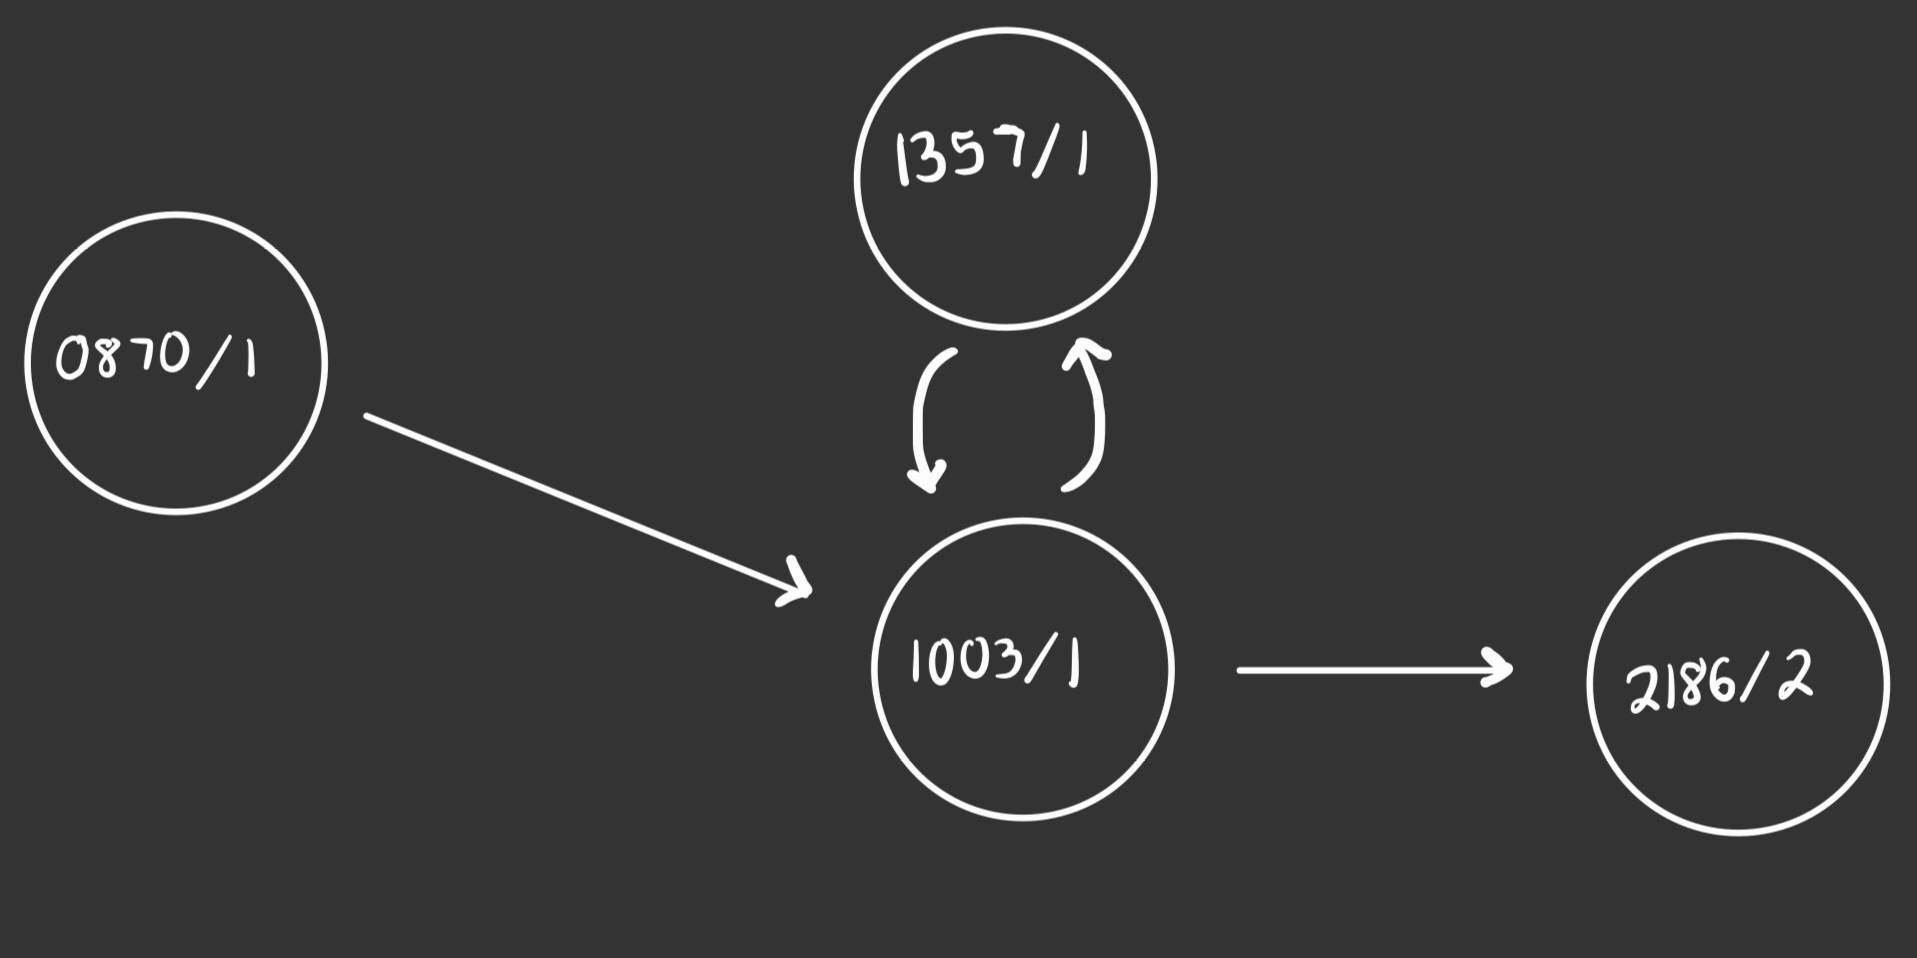

In [11]:
# Step 4 -- Combine Unitigs

# O(n)
unitigStrings , startingReadsToUnitigNum  = getFullStringForEachUnitig(nameToSequenceDictionary, "unitigOutput.txt")


rayyanGenomeAnswer = ""

"""
unitigStrings

1 : TTTGAGC
2 : GGTTGGC


startingReads:

1003/1 : 1
2186/2 : 2
1357/1 : 3
0870/1 : 4

"""
order = ["0870/1","1003/1","1357/1","1003/1","2186/2"]

rayyanGenomeAnswer = unitigStrings[startingReadsToUnitigNum[order[0]]]
for i in range(1,len(order)):
    left = unitigStrings[startingReadsToUnitigNum[order[i-1]]]
    right = unitigStrings[startingReadsToUnitigNum[order[i]]]

    longestCommonSequence = getOverlap(left,right)
    lengthOfLongest = len(longestCommonSequence)

    rayyanGenomeAnswer += right[lengthOfLongest:]

print(rayyanGenomeAnswer)
print(len(rayyanGenomeAnswer))

from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

record = SeqRecord(Seq(rayyanGenomeAnswer),
                   id="001",  # Example ID
                   name="rayyanGenomeAnswer",
                   description=f"Assembled genome from unitigs. Length {len(rayyanGenomeAnswer)}")

with open("rayyanGenomeAnswer.fasta", "w") as output_handle:
    SeqIO.write(record, output_handle, "fasta")


CGTTCACGTCAGAACAGCAGCTAATTAAATGTACAAGTCCCGCGTGCGGGCAGTGCGGATATCAACGCAGGGATGACGAATTACCATTCTGGTAACCGCACCAACATCTGCTCTAGTTGCCGATTTGGCGTATCGCGATTATATATCTTCCGGAACCTATATAAGAGTACTCTGCTCTTGATTATGAACAACACTGGGGTTTGAGCTTTTAAGGGTCAGCCCAGCAAGCGCAAGGTTGATCCGATCCGTCATCCGTAAATCAGCTCTCGTGCCTAACGAGCGATACCTCGTGTGTTCGTCACGATGATTCATTCTCATCTTTCGTTGGTATATACCGTGCTATGTCTCGAAAAAAGCTGGCACCTTTATACGTCTAATGCGCGAAATACCCGCAAGGCCTTCGCGCAGGTTCTGCATCATTCCGCTCCCGACATACCGTTTCGTAGGTTAACTCACTAGCGCCATAGAAGGAGCCAGAGGTATGCGGGCGACGGCTCTAACCACACCGCCGCACACTCCCACAAATCGTTCGTAAGGCGCATTCACCGTGGCACACCCCTGGACAGGAGGATACGGACCTTTACCGCGAGATCGGCATCGACACACTCGCAGACTGACAACCGCTATGTTTCGTTTTAACACAATGGCTAGACCTAATGTAGGCGACGGTCACCACAGTGACCACTGGAAGTGTAAGGAAGGTTAACAGTGGGATGAATCCAAATTGCACCCGCATTGAATTAGGAAGATCCTCTCGACCCTACGAAAAAATTGGGGAGTAACGTATCCTCTTTTGAGGTTTAGATCGGGCTTGTAGTAATCTGCGGCATCGGAACAGACTCTTAATAGTCGGGGGCATTCCTTCTAAAATTCCTGGCAATGCCCGTGCGCGCTGCCAACGGGAACACTCTACGACGGCGACGCCTATAGCCAAGGTGTCTAGCAGGTACAATGGAAGCCGCCTACGTCGACAGACTCGACAAAGACGTACACATCGAAT